In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Mundiales de futbol
db = pd.read_csv("/Users/home/Dropbox/Databases/fifa-world-cup/WorldCupMatches.csv")



In [3]:
db = db[['Year', 'Home Team Name', 'Home Team Goals',
         'Away Team Goals', 'Away Team Name']]

In [4]:
#Aggregated information from world cups
db3 = pd.read_csv("/Users/home/Dropbox/Databases/fifa-world-cup/WorldCups.csv")
# Tranforms the attendance into an integer
db3['Attendance']=db3['Attendance'].replace('\.','',regex=True).astype(int)
db3 = db3.replace('Germany FR', 'Germany')
db3.at[16, 'Country'] = 'Korea Republic'


In [5]:
# World cup 2018

db2 = pd.read_csv("/Users/home/Dropbox/Databases/fifa-world-cup/Cup.Russia.Matches.csv")

# Order the data to make all aggregate data
db2 = db2[['Home Team',
           'Home Team Goals',  'Away Team Goals',
           'Away Team', 'Total Goals', 'Attendance']]

db2['Year'] = 2018
db2['Country'] = 'Russia'
db2['GoalsScored'] = db2['Total Goals'].sum()

# Number of  Qualified teams

# Extract useful columns
db2_1 = db2['Home Team']
db2_2 = db2['Away Team']

# Rename columns to merge
db2_1.columns = ['Teams']
db2_2.columns = ['Teams']

# Row binding
data_merging = [db2_1, db2_2]
db2_12 = pd.concat(data_merging)

# Extract only unique cases
number = len(db2_12.unique().tolist())
db2['Qualifiedteams'] =  number

# Calculate total attendance and number of matches playes
db2['MatchesPlayed'] = db2['Home Team'].count()
db2['Total_attendance'] = db2['Attendance'].sum()

# Filter columns
db2_aggregation_var = db2[['Year', 'Country', 'GoalsScored',
                           'Qualifiedteams', 'MatchesPlayed',
                           'Total_attendance']]
# Create missing columns
db2_aggregation_var['Winner'] = 'France'
db2_aggregation_var['Runners-Up'] = 'Croatia' 
db2_aggregation_var['Third'] = 'Belgium'                    
db2_aggregation_var['Fourth'] = 'England' 

# Re organize columns
db2_aggregation_var = db2_aggregation_var[['Year', 'Country',
                                           'Winner', 'Runners-Up',
                                           'Third', 'Fourth', 
                                           'GoalsScored', 'Qualifiedteams',
                                           'MatchesPlayed', 'Total_attendance']]                    

# Rename columns to bind
db2_aggregation_var.columns =['Year', 'Country',
                                           'Winner', 'Runners-Up',
                                           'Third', 'Fourth', 
                                           'GoalsScored', 'QualifiedTeams',
                                           'MatchesPlayed', 'Attendance']                   

# Extract single row
db2_aggregation_var = db2_aggregation_var[0:1]
# Row binding
wc_row_bind = [db3, db2_aggregation_var]
WC_general_final = pd.concat(wc_row_bind)


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_i

In [6]:
# Graphs of averaged golas per WC
WC_general_final['Mean_goals'] = WC_general_final['GoalsScored']/WC_general_final['MatchesPlayed']


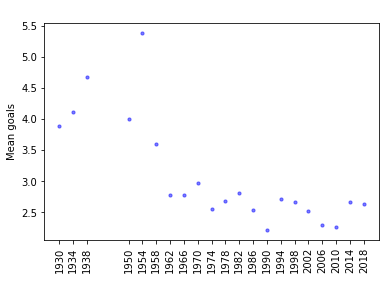

In [19]:
# Graficar los promedios

plt.scatter(WC_general_final['Year'],
            WC_general_final['Mean_goals'],
            s=10, c='blue', alpha=0.5)
plt.title(' ')
plt.xlabel(' ')
plt.ylabel('Mean goals')
plt.xticks(WC_general_final['Year'])
plt.xticks(rotation=90)
plt.savefig('figure.pdf')




In [8]:
# Descriptive statistics finding hidden patterns

# Which team is the most efficient when it reaches the final?

WC_general_final_winner = pd.DataFrame(WC_general_final['Winner'])
WC_general_final_runnerup = pd.DataFrame(WC_general_final['Runners-Up'])

WC_general_final_winner['First'] = 1
WC_general_final_runnerup['Second'] = 1

WC_general_final_winner = pd.DataFrame(WC_general_final_winner.groupby('Winner')['First'].sum()) # Aggregate get goals

WC_general_final_winner['Country']=WC_general_final_winner.index
WC_general_final_winner = WC_general_final_winner.reset_index(drop=True)


WC_general_final_runnerup = pd.DataFrame(WC_general_final_runnerup.groupby('Runners-Up')['Second'].sum())

WC_general_final_runnerup['Country'] = WC_general_final_runnerup.index 
WC_general_final_runnerup = WC_general_final_runnerup.reset_index(drop=True)

WC_general_final_win_runner =  pd.merge(WC_general_final_winner, 
                                        WC_general_final_runnerup,
                                        how='outer', left_on='Country', 
                                        right_on='Country')

WC_general_final_win_runner = WC_general_final_win_runner.replace(to_replace= np.nan,
                                                                  value = 0)

WC_general_final_win_runner['Total'] = WC_general_final_win_runner['First']+ WC_general_final_win_runner['Second']
WC_general_final_win_runner['Proportion_wins'] = WC_general_final_win_runner['First']/WC_general_final_win_runner['Total']


In [9]:
# How many times a European team went to the finals?
# How many times a Latin American team went to the finals?

conditions = [
    (WC_general_final_win_runner['Country'] == 'Brazil') | (WC_general_final_win_runner['Country'] == 'Uruguay') | (WC_general_final_win_runner['Country'] == 'Argentina'),
    (WC_general_final_win_runner['Country'] != 'Brazil') | (WC_general_final_win_runner['Country'] != 'Uruguay') | (WC_general_final_win_runner['Country'] != 'Argentina')]

values = ['Latin America', 'Europe']

WC_general_final_win_runner['Continent'] = np.select(conditions, values)
Finals_app = WC_general_final_win_runner.groupby('Continent')['Total'].sum()
Finals_app


Continent
Europe           28.0
Latin America    14.0
Name: Total, dtype: float64

In [10]:
# How many teams that were host won 

WC_general_final.loc[WC_general_final['Country'] == WC_general_final['Winner'], 'Host_win']  = 1
WC_general_final.loc[WC_general_final['Country'] != WC_general_final['Winner'], 'Host_win']  = 0
Resultado = WC_general_final['Host_win'].sum()/len(WC_general_final['Host_win'])
Resultado

0.2857142857142857

In [11]:
# How many teams that were host lost finals
WC_general_final.loc[WC_general_final['Country'] == WC_general_final['Runners-Up'], 'Host_loss'] = 1
WC_general_final.loc[WC_general_final['Country'] != WC_general_final['Runners-Up'], 'Host_loss'] = 0
Resultado2 = WC_general_final['Host_loss'].sum()/len(WC_general_final['Host_loss'])
Resultado2

0.09523809523809523

In [12]:
# How many host teams at least went to the semifinals


def function(row):
    if row['Country'] == row['Winner']:
        val = 1
    elif row['Country'] == row['Runners-Up']:
        val = 1
    elif row['Country'] == row['Third']: 
        val = 1
    elif row['Country'] == row['Fourth']:
        val = 1
    else:
        val = 0
    return val
        
WC_general_final['Host_semifinal'] = WC_general_final.apply(function, axis=1)  
WC_general_final.reset_index(drop=True)

Resultado3 = WC_general_final['Host_semifinal'].sum()/len(WC_general_final['Host_semifinal'])
Resultado3

0.6190476190476191

In [13]:
# Create a variable of Year for Russia
db2['Year'] = 2018
# Re organize the variables
db2_matches = db2[['Year','Home Team', 'Home Team Goals', 'Away Team Goals',
                   'Away Team']]


# Rename the variables
db2_matches.columns = ['Year', 'Home Team Name', 'Home Team Goals', 
                      'Away Team Goals', 'Away Team Name']

matches_bind = [db,db2_matches]
WC_matches_final = pd.concat(matches_bind)


In [14]:
# Points of home team
def results(row):
    if row['Home Team Goals'] > row['Away Team Goals']:
        val = 3
    elif row['Home Team Goals'] == row['Away Team Goals']:
        val = 1
    else:  
        val = 0
    return val

WC_matches_final['Home team points'] = WC_matches_final.apply(results, axis=1)
WC_matches_final.reset_index(drop=True)

# Points of away team
def results2(row):
    if row['Home Team Goals'] < row['Away Team Goals']:
        val = 3
    elif row['Home Team Goals'] == row['Away Team Goals']:
        val = 1
    else:
        val = 0
    return val


WC_matches_final['Away team points'] = WC_matches_final.apply(results2, axis=1)
WC_matches_final.reset_index(drop=True)
WC_matches_final.head()

# Network analysis [Por donde pasan los equipos, cuáles equipos están al centro]



,Year,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Home team points,Away team points
0,1930.0,France,4.0,1.0,Mexico,3,0
1,1930.0,USA,3.0,0.0,Belgium,3,0
2,1930.0,Yugoslavia,2.0,1.0,Brazil,3,0
3,1930.0,Romania,3.0,1.0,Peru,3,0
4,1930.0,Argentina,1.0,0.0,France,3,0


In [15]:
# Desarmar la base por equipos y total de puntos
WC_matches_results1 = WC_matches_final[['Year', 'Home Team Name',
                                        'Home Team Goals', 'Home team points']]

# Desarmar la base por equipos y total de puntos
WC_matches_results2 = WC_matches_final[['Year', 'Away Team Name',
                                        'Away Team Goals', 'Away team points']]

WC_matches_results1.columns = ['Year', 'Team', 'Team goals', 'Team points']
WC_matches_results2.columns = ['Year', 'Team', 'Team goals', 'Team points']

matches_bind2 = [WC_matches_results1,WC_matches_results2]
WC_matches_final_points = pd.concat(matches_bind2)
WC_matches_final_points = WC_matches_final_points.replace('Germany FR', 'Germany')

# Summary of points per team 
WC_matches_summary_points = pd.DataFrame(WC_matches_final_points.groupby('Team').agg(
    {'Team goals': 'sum',
     'Team points': 'sum',
     'Team': 'count'}))
WC_matches_summary_points.columns = ['Team goals', 'Team points', 'Team matches']

# Who has more points?
WC_matches_summary_points['Teams'] = WC_matches_summary_points.index
WC_matches_summary_points.reset_index(drop=True, inplace=True)
WC_matches_summary_points.sort_values(['Team points'], ascending=False)

# Who has more points based in the amount of participations?
WC_matches_summary_points['proportion'] = WC_matches_summary_points['Team points']/WC_matches_summary_points['Team matches']
WC_matches_summary_points.sort_values(['proportion'], ascending=False)


,Team goals,Team points,Team matches,Teams,proportion
7,233.0,241,113,Brazil,2.132743
28,237.0,233,113,Germany,2.061947
39,128.0,156,83,Italy,1.879518
47,91.0,101,54,Netherlands,1.870370
2,139.0,151,85,Argentina,1.776471
...,...,...,...,...,...
24,1.0,0,6,El Salvador,0.000000
31,2.0,0,3,Haiti,0.000000
70,1.0,0,3,Togo,0.000000
37,1.0,0,3,Iraq,0.000000


In [16]:
# Save dataframe to .csv file to work on it in R
#WC_matches_final.to_csv('WC_matches_final.csv')